In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('preprocessed_DNN (5).csv', low_memory=False)
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-1.debian.pool.ntp.org,dns.qry.name.len-2.debian.pool.ntp.org,dns.qry.name.len-3.debian.pool.ntp.org,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
0,0,0,0,0,0,0,0,0,110218025,1249069932,...,False,False,False,False,True,False,True,False,True,False
1,0,0,0,0,0,0,0,0,1,3306662301,...,False,False,False,False,True,False,True,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
3,0,0,0,0,0,0,0,0,930,142931531,...,False,False,False,False,True,False,True,False,True,False
4,0,0,0,0,0,0,0,0,442,984983596,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152191,0,0,0,0,0,0,0,0,1,2013966124,...,False,False,False,False,True,False,True,False,True,False
152192,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
152193,0,0,0,0,0,0,0,0,103,1752254882,...,False,False,False,False,True,False,True,False,True,False
152194,0,0,0,0,0,0,0,0,719652,2372344333,...,False,False,False,False,True,False,True,False,True,False


In [2]:
df['Attack_type'].value_counts()

Attack_type
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: count, dtype: int64

In [3]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

In [4]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [5]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [6]:
df[skip_list[3]].value_counts()

mqtt.msg_decoded_as
0    152196
Name: count, dtype: int64

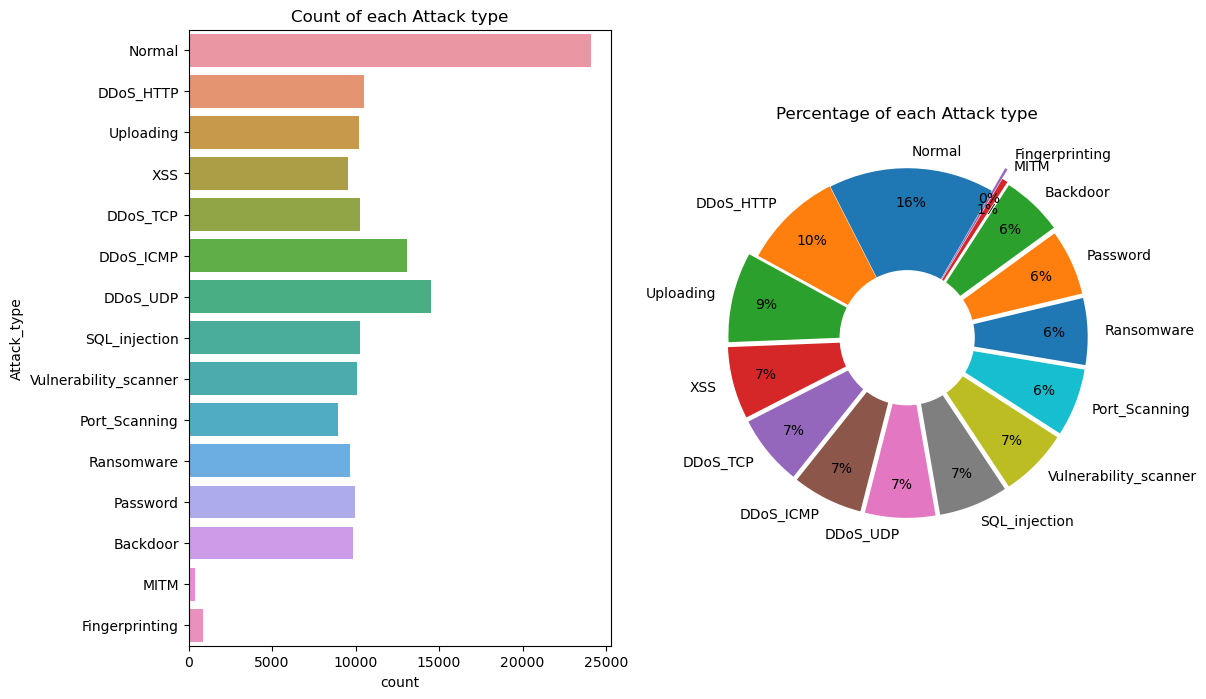

In [7]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [8]:
X = df.drop([label_col], axis=1)
y = df[label_col]

# Drop rows with NaN values in the target variable 'y'
nan_rows = y.isnull()
X = X[~nan_rows]
y = y[~nan_rows]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(121756, 68) (30440, 68) (121756,) (30440,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr =  LogisticRegression()
dt = DecisionTreeClassifier()

In [13]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

/home/cse/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [14]:
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)

In [15]:
lr_pred = accuracy_score(lr_preds, y_test)
dt_pred = accuracy_score(dt_preds, y_test)
print(lr_pred)
print(dt_pred)

0.6549605781865966
0.8759855453350854


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_preds)
cm

array([[1484,  159,    0,    0,    0,    0,    0,    0,   31,   47,  223,
           0,   29,    0,    0],
       [ 379, 1137,    0,    0,    1,    0,    0,    0,  103,    0,  301,
         116,    1,   29,   32],
       [   0,    0, 2602,    0,    6,   11,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0, 1190,    0,    0,    0,    0,    0,  836,    0,
           0,   23,    0,    0],
       [   0,    0,    1,    0, 2899,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,   28,   37,    0,    4,   76,    0,    0,    0,   26,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    8,    0,   64,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4820,    0,    0,    0,
           0,    0,    0,    0],
       [ 417,  173,    0,    0,    0,    0,    0,    0,  606,    0,  321,
         461,    0,    0,   16],
       [   0,   20,    0,    0,    0,

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(rf_preds, y_test)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8836727989487516


In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(svm_preds, y_test)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.6392247043363994


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(knn_preds, y_test)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7330486202365308


In [23]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(xgb_preds, y_test)
print("XGBoost Accuracy:", xgb_acc)

/home/cse/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:39:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9091655716162943


In [24]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_acc = accuracy_score(nb_preds, y_test)
print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.509526938239159


In [25]:
!pip install shap
import shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/2b/c8/7b607f4524c6315c4386cb23e92e944f38478b84e34214752b668f986b1e/shap-0.48.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.5 MB/s eta 0:00:00:00:010:01


In [ ]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Visualize a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :])

In [1]:

import matplotlib.pyplot as plt

# Assuming 'rf_classifier', 'X_test', and 'explainer' are already defined

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values[1], X_test, show=False)

# Show the plot
plt.show()


NameError: name 'explainer' is not defined